In [83]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import math

1. Load the data from supplied data file. Remove the observations/samples where the heart diseases are not diagnosed by the Cardiologists. Print the data dimension before and after removing the observations/samples.

In [84]:
dtemp = pd.read_csv(
    'A1_heart_disease_dataset.csv'
    ,sep=','
    )

In [85]:
dtemp_1 = dtemp.loc[dtemp['state']!=0]
print('the data dimension before removing samples is {}'.format(dtemp.shape))
print('the data dimension after removing samples is {}'.format(dtemp_1.shape))

the data dimension before removing samples is (303, 14)
the data dimension after removing samples is (143, 14)


2. Display the number of rows and their indices that have missing data in one or more cells. Now, replace the missing data by the lowest value of the corresponding feature if it is a continuous variable. In case of categorical variable, remove the sample. Print the median values of all features before and after replacing missing data.

In [86]:
sum = 0
for rows in range(0, len(dtemp_1)):
  na = dtemp_1.iloc[rows].isnull().sum()
  if na!=0:
    print('row {rows} has {na} missing data'.format(rows=dtemp_1.index[rows], na=na))
    sum+=1
print('There are totally {} rows have missing data'.format(sum))

row 6 has 1 missing data
row 16 has 14 missing data
row 55 has 14 missing data
row 67 has 1 missing data
row 114 has 14 missing data
row 165 has 2 missing data
row 187 has 14 missing data
row 201 has 14 missing data
row 212 has 14 missing data
row 213 has 14 missing data
row 223 has 1 missing data
row 228 has 1 missing data
row 290 has 1 missing data
row 300 has 14 missing data
There are totally 14 rows have missing data


In [87]:
dmeans = dtemp_1.mean()

C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\2840989494.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dmeans = dtemp_1.mean()


In [88]:
for each in dtemp_1.columns:
  a = dtemp_1[each].dtypes
  if a == 'float64':
    b = dtemp_1[each].min()
    dtemp_1[each].fillna(b, inplace=True)
ds = dtemp_1.dropna(axis=0, how='any')

C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\4041275153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtemp_1[each].fillna(b, inplace=True)


In [89]:
print('The median values of all features before replacing missing data is:')
print(dmeans)
print('\nThe median values of all features after replacing missing data is:')
ds.mean()

The median values of all features before replacing missing data is:
age          56.511111
trestbps    134.481481
chol        252.425373
restecg       1.207407
thalach     140.044776
exang         0.540741
oldpeak       1.583704
slope         1.800000
ca            1.105263
thal          5.770370
state         2.045113
dtype: float64

The median values of all features after replacing missing data is:


C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\2224254565.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.mean()


age          56.470149
trestbps    134.440299
chol        251.537313
restecg       1.201493
thalach     139.380597
exang         0.544776
oldpeak       1.568657
slope         1.791045
ca            1.082090
thal          5.791045
state         2.022388
dtype: float64

3. Continue from question 2. Is there any change in data type? If yes, convert them back to appropriate data types. Print all variables with corresponding data type.

In [90]:
ds.dtypes # this is the dataset without empty value

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object

In [91]:
dtemp.dtypes # this is the dataset copy from .csv file in question 1

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object

In [92]:
print('There is not change on data type so skip this question.')

There is not change on data type so skip this question.


4. Continue from question 3. Print the total numbers and ration of male and female patients who are at highest risk of heart disease.

In [93]:
a = ds.loc[ds['sex']=='M']
b = ds.loc[ds['sex']=='F']
c = ds.loc[(ds['sex']=='M') & (ds['state']==4)]
d = ds.loc[(ds['sex']=='F') & (ds['state']==4)]

In [94]:
print(
    'There are {a} male patients, {c}% which is also {e} of them are at highest risk of heart disease.'.format(
        a = len(a)
        ,c = round(len(c)/len(a)*100,5)
        ,e = len(c)
        )
    )

print(
    'There are {b} female patients, {d}% which is also {f} of them are at highest risk of heart disease.'.format(
        b = len(b)
        ,d = round(len(d)/len(b)*100,5)
        ,f = len(d)
        )
    )

There are 112 male patients, 9.82143% which is also 11 of them are at highest risk of heart disease.
There are 22 female patients, 9.09091% which is also 2 of them are at highest risk of heart disease.


5. Continue from question 3. Is there any association between heart rate and severity of heart disease?  Explain your results from given dataset. 

In [95]:
a = []
for each in ds['thalach'].values:
  a.append(
          math.ceil(each/10) * 10
      )
ds['thalach_group'] = a
ds[['thalach_group', 'state']].groupby(['thalach_group','state'])['state'].count()

C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\2577835431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['thalach_group'] = a


thalach_group  state
80             1.0       1
               2.0       1
90             1.0       1
               3.0       1
100            1.0       1
               3.0       2
110            1.0       3
               2.0       3
               3.0       2
120            1.0       2
               2.0       3
               3.0       6
               4.0       1
130            1.0       5
               2.0       2
               3.0       6
               4.0       4
140            1.0       5
               2.0       5
               3.0       5
               4.0       3
150            1.0      10
               2.0      13
               3.0       4
               4.0       1
160            1.0      11
               2.0       4
               3.0       2
               4.0       1
170            1.0       9
               2.0       3
               3.0       3
               4.0       2
180            1.0       5
               3.0       1
190            1.0       1
       

<function matplotlib.pyplot.show(close=None, block=None)>

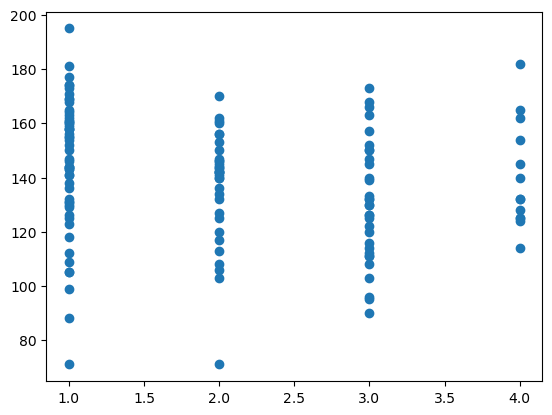

In [96]:
mp.figure()
mp.scatter(ds['state'].values, ds['thalach'].values)
mp.show

According to above two graphes, most of patients, especially for those who has higher heart disease risk state, has heart rate from 120 to 170.


6. Continue from question 3. Print the average cholesterol level for different number of blocked blood  vessels across gender. Please report the pattern found in the result, if any. 

In [97]:
for each in range(0,4):
  a = ds.loc[(ds['sex']=='M') & (ds['ca']==each)]
  print('The average cholesterol level for male patients that has {each} number of blocked blood vessels is:'.format(
      each = each
  ))
  print(a['chol'].mean())
print('')
for each in range(0,4):
  a = ds.loc[(ds['sex']=='F') & (ds['ca']==each)]
  print('The average cholesterol level for female patients that has {each} number of blocked blood vessels is:'.format(
      each = each
  ))
  print(a['chol'].mean())

The average cholesterol level for male patients that has 0 number of blocked blood vessels is:
242.53846153846155
The average cholesterol level for male patients that has 1 number of blocked blood vessels is:
243.0
The average cholesterol level for male patients that has 2 number of blocked blood vessels is:
243.72727272727272
The average cholesterol level for male patients that has 3 number of blocked blood vessels is:
271.9166666666667

The average cholesterol level for female patients that has 0 number of blocked blood vessels is:
284.6
The average cholesterol level for female patients that has 1 number of blocked blood vessels is:
220.5
The average cholesterol level for female patients that has 2 number of blocked blood vessels is:
294.6666666666667
The average cholesterol level for female patients that has 3 number of blocked blood vessels is:
272.5


According to the result, Female patients with higher cholesterol level tend to have higher probability to have blocked blood vessels than male patients.

7. Print the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar  with asymptomatic chest pain.

In [98]:
a = ds.loc[
           (ds['cp']=='asp') 
           & (ds['fbs']=='yes') 
           & (ds['restecg']!=0)
           ]
print('the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain is:')
print(round(len(a)/len(ds)*100, 5),'%')

the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain is:
8.20896 %


8. Calculate and print the average blood pressure of all observations with non-flat ST slopes of ECG. 


In [99]:
print('the average blood pressure of all observations with non-flat ST slopes of ECG is:')
print(ds.loc[ds['restecg']!=0]['trestbps'].mean())

the average blood pressure of all observations with non-flat ST slopes of ECG is:
136.91463414634146


9. Create and print a dataframe of the heart rate, blood pressure and cholesterol levels for different age  groups (based on 10 years interval).

In [100]:
a = []
for each in ds['age'].values:
  a.append(
          math.ceil(each/10) * 10
      )
ds['age_group'] = a
ds_1 = ds.groupby(['age_group'])['thalach', 'trestbps', 'chol'].mean()
ds_1.head() # create this variable for question 14

C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\2351596276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['age_group'] = a
C:\Users\m1371\AppData\Local\Temp\ipykernel_47496\2351596276.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ds_1 = ds.groupby(['age_group'])['thalach', 'trestbps', 'chol'].mean()


,thalach,trestbps,chol
age_group,,,
40,150.500000,124.333333,220.000000
50,141.545455,126.272727,242.409091
60,141.106061,137.727273,254.878788
70,132.948718,135.282051,254.538462
80,162.000000,125.000000,304.000000


10. Continue from question 3. Find the average cholesterol level of across gender for each age group. Please  explain the results. 

In [101]:
print('the average cholesterol level of across gender for each age group:')
ds.groupby(['age_group', 'sex'])['chol'].mean()

the average cholesterol level of across gender for each age group:


age_group  sex
40         M      220.000000
50         F      341.000000
           M      237.714286
60         F      280.583333
           M      249.166667
70         F      270.777778
           M      249.666667
80         M      304.000000
Name: chol, dtype: float64

The results tell us that in age group from 50 to 70, most of female patients has higher cholesterol level than male patients.

11. Continue from question 3. Draw two scatter plots of cholesterol level, one against blood pressure and  another against heart rate. Draw them in two subplots of the same plot.  


<function matplotlib.pyplot.show(close=None, block=None)>

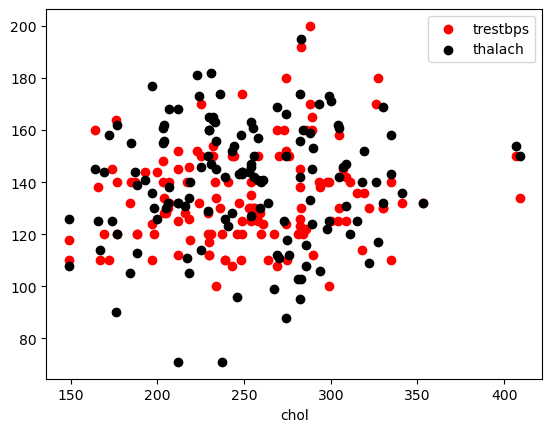

In [102]:
mp.figure()
mp.scatter(ds['chol'].values, ds['trestbps'].values, c='red', label = 'trestbps')
mp.scatter(ds['chol'].values, ds['thalach'].values, c='black', label = 'thalach')
mp.xlabel('chol')
mp.legend()
mp.show

12. Visualize the cholesterol level against number of blood vessel blocked for male and female using line  plot. Explain the graph base on your observation. 


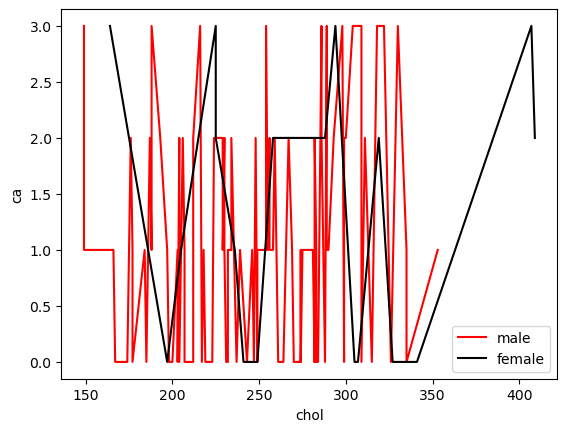

In [103]:
a = ds[['sex', 'chol', 'ca']].copy()
a = a.sort_values(by=['chol'], ascending = True)

chol_m = list(a[a['sex']=='M']['chol'])
chol_f = list(a[a['sex']=='F']['chol'])
ca_m = list(a[a['sex']=='M']['ca'])
ca_f = list(a[a['sex']=='F']['ca'])

mp.plot(chol_m, ca_m, label = 'male', color='red')
mp.plot(chol_f, ca_f, label = 'female', color='black')
mp.legend()
mp.xlabel('chol')
mp.ylabel('ca')
mp.show()

This result shows that compare with female patients, male patients shows more instability on relationship between cholesterol level and heart rate.

13. Draw a group bar diagram of heart rate, blood pressure and total number of patients, based on age  groups defined in question 9. Explain your observation from the graph. 


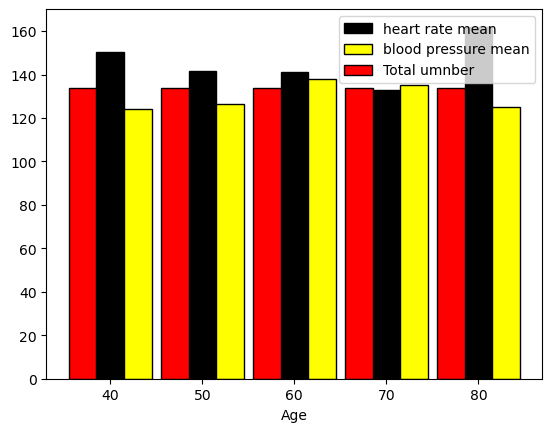

In [104]:
a = ds[['age_group', 'thalach', 'trestbps']].copy()
a = a.sort_values(by=['age_group'], ascending = True)
b = a.groupby('age_group').mean()
width = 3

mp.bar(
    x = b.index, 
    height=b['thalach'], 
    width = width, 
    label = 'heart rate mean', 
    color = 'black', 
    edgecolor = 'black'
    )

mp.bar(
    x = b.index + width
    , height=b['trestbps']
    , width = width
    , label = 'blood pressure mean'
    , color = 'yellow'
    , edgecolor = 'black'
    )

mp.bar(
    x = b.index - width
    , height=len(a)
    , width = width
    , label = 'Total umnber'
    , color = 'red'
    , edgecolor = 'black'
    )

mp.legend()
mp.xlabel('Age')
mp.show()


Accoding to the bar chart, patients in age group from 70 to 80, trend to have higher heart rate, Also for those under 30, they trend to have higher heart rate. 

For those Patients who are in group from 50 to 70, most of them have lower heart rate while higher blood pressure.

14. Continue from question 9. Add two more columns named [‘num_male_patients’, ‘num_female_patients’]  and having values of the number of male and female patients affected by heart disease in each age  group respectively. Save the combined dataset to a csv file named ‘age_group_stat.csv’ in the same  directory of your code file. 

In [105]:
a = ds[['age_group', 'sex', 'state']].groupby(['age_group','state','sex'])['sex'].count()
print(a)
a.to_csv('age_group_stat.csv', index = True)

age_group  state  sex
40         1.0    M       3
           3.0    M       2
           4.0    M       1
50         1.0    M      10
           2.0    F       1
                  M       4
           3.0    M       6
           4.0    M       1
60         1.0    F       4
                  M      24
           2.0    F       4
                  M      13
           3.0    F       4
                  M      12
           4.0    M       5
70         1.0    F       5
                  M       9
           2.0    F       1
                  M      11
           3.0    F       1
                  M       7
           4.0    F       2
                  M       3
80         4.0    M       1
Name: sex, dtype: int64


15. Continue from question 1. Replace all the rows where the ‘state’ is null with its immediate  previous row. Finally, display and save the resultant dataset to a csv file named  ‘clean_data.csv’ in the same directory of your code file. 

In [106]:
ds = dtemp_1.dropna(axis=0, how='any') # dtemp_1 is the dataset changed nothing but heart disease risk state (removed all 0)
ds.to_csv('clean_data.csv', index = False)